In [1]:
print('Regression with TensorFlow ')

Regression with TensorFlow 


We have to make the equation Y = a* X + b

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

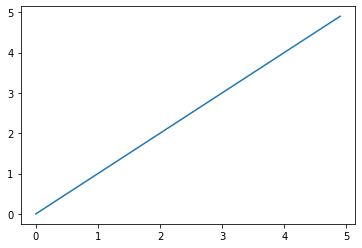

In [3]:
x = np.arange(0.0, 5.0, 0.1)
a = 1
b = 0
y = a*x + b
plt.plot(x,y)
plt.show


In [0]:
import pandas as pd


In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-04 04:08:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   420KB/s    in 0.2s    

2020-02-04 04:08:13 (420 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [0]:
import pandas as pd
df = pd.read_csv('FuelConsumption.csv')

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.shape

(1067, 13)

In [9]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [12]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [13]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [14]:
df["FUELCONSUMPTION_CITY"].dtype

dtype('float64')

In [15]:
df[['FUELCONSUMPTION_CITY','CO2EMISSIONS']].corr()

,FUELCONSUMPTION_CITY,CO2EMISSIONS
FUELCONSUMPTION_CITY,1.000000,0.898039
CO2EMISSIONS,0.898039,1.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

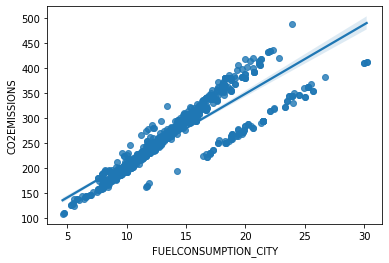

In [17]:
sns.regplot(x= 'FUELCONSUMPTION_CITY', y ='CO2EMISSIONS' , data = df)

In [0]:
from scipy import stats

pearson_coef, p_value = stats. pearsonr(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'])

In [19]:
print('{}   {}'.format(pearson_coef, p_value))

0.8980385119353924   0.0


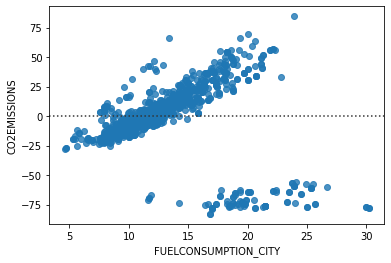

In [20]:
sns.residplot(df['FUELCONSUMPTION_CITY'],df['CO2EMISSIONS'])

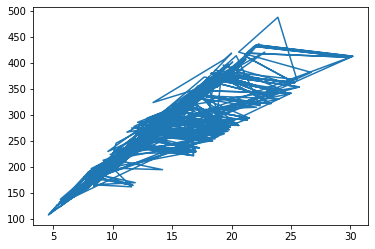

In [21]:
x = df['FUELCONSUMPTION_CITY']
y = df['CO2EMISSIONS']

plt.plot(x,y)

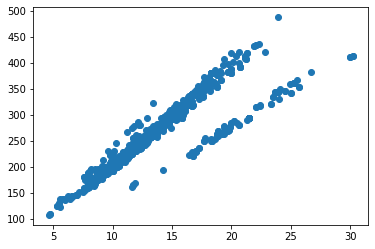

In [22]:
plt.scatter(x,y)

In [23]:
df['FUELCONSUMPTION_CITY'].value_counts()

13.7    20
9.1     19
8.7     18
14.2    17
9.3     17
        ..
24.0     1
19.2     1
18.5     1
6.5      1
6.0      1
Name: FUELCONSUMPTION_CITY, Length: 167, dtype: int64

In [24]:
df['CO2EMISSIONS'].value_counts()

294    25
230    22
225    21
209    20
179    19
       ..
437     1
256     1
227     1
213     1
108     1
Name: CO2EMISSIONS, Length: 159, dtype: int64

As these two are very closely correlated, we will cosider one as featrure column and another as target column.


In [0]:
x = np.asanyarray(df[['FUELCONSUMPTION_CITY']], dtype='float32')
y = np.asanyarray(df[['CO2EMISSIONS']], dtype='float32')

In [64]:
x.size

1067

In [65]:
x.shape

(1067, 1)

In [66]:
x[0:10]

array([[ 9.9],
       [11.2],
       [ 6. ],
       [12.7],
       [12.1],
       [11.9],
       [11.8],
       [12.8],
       [13.4],
       [10.6]], dtype=float32)

In [67]:
y[:10]

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [255.],
       [267.],
       [212.]], dtype=float32)

Now we take two variable, to come up with the regression equation.
we are taking variable instead of tensor because, variables can get updated or change will the training is going on.

In [0]:
a = tf.Variable(10) # initalizing with an initial value
b = tf.Variable(0)

In [0]:
yhat = a * x + b 

In [0]:
loss = tf.reduce_mean(tf.square(yhat-y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [0]:
train = optimizer.minimizer=(loss)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [90]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 17350 10 0
5 17350 10 0
10 17350 10 0
15 17350 10 0
20 17350 10 0
25 17350 10 0
30 17350 10 0
35 17350 10 0
40 17350 10 0
45 17350 10 0
50 17350 10 0
55 17350 10 0
60 17350 10 0
65 17350 10 0
70 17350 10 0
75 17350 10 0
80 17350 10 0
85 17350 10 0
90 17350 10 0
95 17350 10 0
